<a href="https://colab.research.google.com/github/Muzi-HS/2023ML/blob/main/dong's_valsetV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>3분 만에 전이 학습(Transfer Learning)을 활용한 인공지능 서비스 만들기</b>

* 본 프로젝트에서는 세 가지 기능을 합쳐서 순식간에 상용 인공지능 서비스를 제작합니다.
    1. 이미지 크롤링(image crawling) 혹은 크롤링 라이브러리
    2. 전이 학습(transfer learning)
    3. 웹 API 개발
* 이 프로젝트에서 만들어 볼 것은 <b>마동석/김종국/이병헌</b> 분류기(classifier)입니다.
* 단 <b>3분</b> 만에 인공지능 개발의 전체 과정을 진행합니다.
    * 데이터 수집/정제
    * 인공지능 모델 학습
    * 학습된 모델 배포
* 한글 폰트 설치 이후에 <b>[런타임] - [런타임 다시 시작]</b>을 수행해야 합니다.

In [1]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
!apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
#matplotlib.font_manager._rebuild()

!pip install koreanize-matplotlib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,805 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 90.7 MB/s eta 0:00:00


In [2]:
import koreanize_matplotlib

In [3]:
# 필요한 라이브러리 설치하기
!git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 86 (delta 17), reused 10 (delta 10), pack-reused 64
Unpacking objects: 100% (86/86), 17.48 KiB | 941.00 KiB/s, done.


#### <b>1. 이미지 크롤링을 활용한 학습 이미지 수집</b>

* 수집한 이미지를 저장하기 위한 폴더를 생성하고, 필요한 함수를 정의합니다.

In [4]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader

directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
    './custom_dataset/val/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt, val_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        elif cnt < train_cnt + val_cnt:
            print(f'[Validation Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/val/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)


* <b>마동석</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [6]:
query = '로제'
downloader.download(query, limit=50,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query,30,10 )

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://i0.wp.com/blackpinkupdate.com/wp-content/uploads/2019/06/1-BLACKPINK-Rose-Instagram-Update-7-June-2019.jpg?fit=1080%2C1349&amp;ssl=1)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://img.marieclairekorea.com/2021/04/mck_60867ae03fa5d.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://blog.kakaocdn.net/dn/c2o87P/btqDJfk44PT/3kh41qkrSIky7JrqXMP591/img.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://mblogthumb-phinf.pstatic.net/MjAxODA2MjFfMjg0/MDAxNTI5NTQ3MDEyNDY5.FuVGy0lM-g_QQMzdoWXask6eVLtSMBy0TDq-0tbEEf8g.P3F4YD_shxVkmOoFgXrJQBBzh9Y8BCfkQLMu0nL2H8Ag.JPEG.pola0216/로제배경화면06.jpg?type=w800)
[Info] Issue getting: https://mblogthumb-phinf.pstatic.net/MjAxODA2MjFfMjg0/MDAxNTI5NTQ3MDEyNDY5.FuVGy0lM-g_QQMzdoWXask6eVLtSMBy0TDq-0tbEEf8g.P3F4YD_shxVkmOoFgXrJQBBzh9Y8BCfkQLMu0nL2H8Ag.JPEG.pola0216/로제배경화면06.jpg?type=w800
[Error] 'ascii' codec can't encode characters in position 147-152: ordinal not in range(128)
#4 이미지 다운로드 (http:/

* <b>김종국</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [31]:
query = '지수'
downloader.download(query, limit=50,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query,30,10 )

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://data2.bepick.net/bbs/2019/09/d9ea864b0430f5fdb5b3fc7b9b5e9127_20190915024240.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://1.bp.blogspot.com/-w-BZBELysO0/X8XBLPwI_TI/AAAAAAAABBA/RjDwIWm0mLA9nHpK_XwbuhqG68drWFXEwCLcBGAsYHQ/s1670/download.png)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://rare-gallery.com/uploads/posts/346249-BLACKPINK-Kpop-K-pop-Girls-Jisoo-Kim-Ji-soo-Beautiful-Vogue-Photoshoot-Photo-shoot-Lipstick.jpg)
[Info] Issue getting: https://rare-gallery.com/uploads/posts/346249-BLACKPINK-Kpop-K-pop-Girls-Jisoo-Kim-Ji-soo-Beautiful-Vogue-Photoshoot-Photo-shoot-Lipstick.jpg
[Error] HTTP Error 403: Forbidden
#3 이미지 다운로드 (http://www.onlifezone.com/files/attach/images/6006007/678/743/017/de31e69b267908e9cbf7da41a76384e5.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://postfiles5.naver.net/MjAxNzAxMTdfMzAg/MDAxNDg0NjIzMzIwODcy.Ntvx4tLXwer9-SgeT0g2nFvOYe5H0OMm6MJbvHc2EGcg.noMrH-lCz-97FXL3KiKLzdOrkqEds5o3ks87PWA

* <b>이병헌</b> 이미지 크롤링을 진행하고 데이터셋을 구축합니다.

In [32]:
query = '리사'
downloader.download(query, limit=50,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query,30,10 )

[Info] Indexing page: 1
[Info] Indexed 37 Images on Page 1.
#1 이미지 다운로드 (https://img.sbs.co.kr/newsnet/etv/upload/2022/03/29/30000751780_1280.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://i.pinimg.com/736x/78/07/1d/78071d31e5fa255f2621c12790edae87.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://gifsf.com/files/attach/images/332597/072/450/003/2c67936e8d0f91edbb60953e3d607b8f.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://dimg.donga.com/a/477/0/90/5/wps/SPORTS/IMAGE/2011/06/02/37736385.2.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://www.nemopan.com/files/attach/images/6294/659/866/013/63bfbbc70e4c47fbf6e26879f5026ba1.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://t1.daumcdn.net/cfile/tistory/213D874457ADEA6818)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://dimg.donga.com/wps/SPORTS/IMAGE/2017/08/02/85641159.2.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://i.pinimg.com/originals/a8/92/c1/a892c1f4ca2794b697b72a88c38ac9ed.jpg)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (https://t1.daumcdn.net/cfile/tis

In [33]:
query = '제니'
downloader.download(query, limit=50,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query,30,10 )

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://1.bp.blogspot.com/-Tua1MXTw1SM/YJyNm-AAHGI/AAAAAAACJjc/9UPRil5otKssML2RkardNyLSUzL_8bRXQCLcBGAsYHQ/s0/pic_009.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://blog.kakaocdn.net/dn/bEMscG/btqC487CI52/kmkCYD6kGggwOjnjqWKDRk/img.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://img.etoday.co.kr/pto_db/2016/11/20161119080643_974737_600_900.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://t1.daumcdn.net/thumb/R1024x0/?fname=http://cfile259.uf.daum.net/image/993161395C2B335E2319A6)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://1.bp.blogspot.com/-p8qEOdEY9mM/YJyNlCAd2KI/AAAAAAACJjA/RckikukXVag_wOHhERbUrJT32W5r2P2FwCLcBGAsYHQ/s0/pic_002.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://fimg4.pann.com/new/download.jsp?FileID=46429067)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://image.ytn.co.kr/osen/2020/08/872879c9-0598-49c8-acbd-ca0e996a274b.jpg)
[Error] Invalid image, not saving https://image.ytn.co.kr/osen/2020/08/872879c9-0598-

#### <b>2. PyTorch를 이용한 전이 학습(Transfer Learning)</b>

* 전이 학습(transfer learning)의 동작 과정을 간략화한 것은 다음과 같습니다.

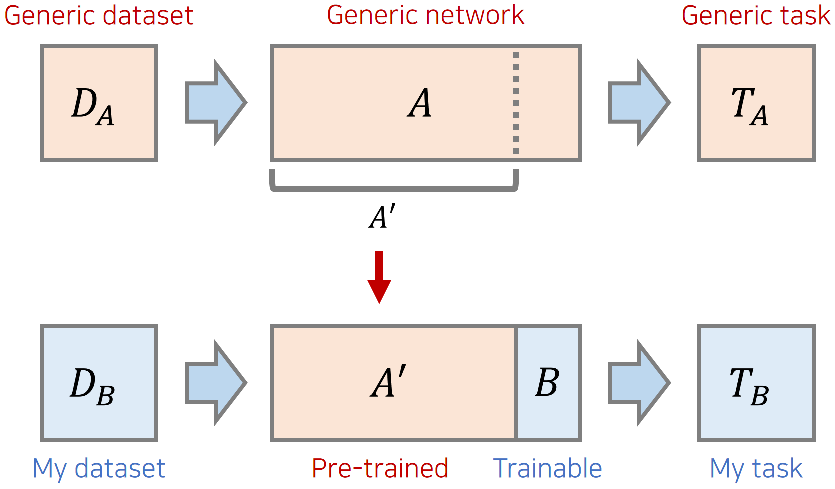

* 학습을 위해 필요한 라이브러리를 불러옵니다.

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch import nn
import torchvision
from torchvision import datasets, models, transforms
import tensorflow as tf
import numpy as np
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

* 데이터셋을 불러옵니다.

In [43]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])
transforms_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
val_datasets = datasets.ImageFolder(os.path.join(data_dir, 'val'), transforms_test)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
val_dataloader = torch.utils.data.DataLoader(val_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('val 데이터셋 크기:', len(val_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 147
val 데이터셋 크기: 60
테스트 데이터셋 크기: 40
클래스: ['로제', '리사', '제니', '지수']


* 간단히 이미지를 시각화해 봅시다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


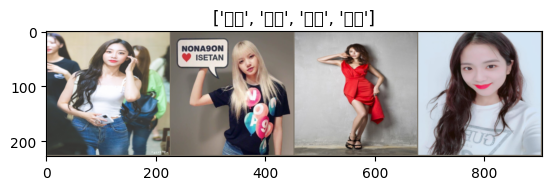

In [44]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

* 학습할 CNN 딥러닝 모델 객체를 초기화합니다.

In [45]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

* 학습을 진행합니다.

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def evaluate(model, criterion, dataloader, device):
    model.eval()
    running_loss = 0.
    running_corrects = 0
    y_true, y_pred = [], []
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        y_true += labels.cpu().numpy().tolist()
        y_pred += preds.cpu().numpy().tolist()

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = running_corrects / len(dataloader.dataset) * 100.
    conf_mat = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, target_names=class_names)
    acc = accuracy_score(y_true, y_pred)

    print('Confusion Matrix:')
    print(conf_mat)
    print('Classification Report:')
    print(class_report)

    return epoch_loss, epoch_acc


In [61]:
import copy
import time
num_epochs = 50
model.train()
start_time = time.time()
best_acc = 10

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

    # validation을 위한 함수 호출
    val_loss, val_acc = evaluate(model, criterion, val_dataloader, device)
    
    # validation 결과 출력
    print('Validation Loss: {:.4f} Acc: {:.4f}%'.format(val_loss, val_acc))

    # Best Model 저장
    if val_acc > best_acc:
        best_acc = val_acc
        best_model_wts = copy.deepcopy(model.state_dict())
    end = time.time()
    time_elapsed= end - start_time
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Validation Accuracy: {:.4f}'.format(best_acc))

    # Best Model 불러오기
    model.load_state_dict(best_model_wts)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#0 Loss: 0.3389 Acc: 90.4762% Time: 6.3341s
Confusion Matrix:
[[ 8  0  0  3]
 [ 0 13  1  1]
 [ 0  0 14  3]
 [ 0  0  4 13]]
Classification Report:
              precision    recall  f1-score   support

          로제       1.00      0.73      0.84        11
          리사       1.00      0.87      0.93        15
          제니       0.74      0.82      0.78        17
          지수       0.65      0.76      0.70        17

    accuracy                           0.80        60
   macro avg       0.85      0.80      0.81        60
weighted avg       0.83      0.80      0.81        60

Validation Loss: 0.5259 Acc: 80.0000%
Training complete in 0m 9s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#1 Loss: 0.4624 Acc: 82.9932% Time: 13.4873s
Confusion Matrix:
[[ 0  0  7  4]
 [ 0  0 10  5]
 [ 0  0 10  7]
 [ 0  0  6 11]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.00      0.00      0.00        11
          리사       0.00      0.00      0.00        15
          제니       0.30      0.59      0.40        17
          지수       0.41      0.65      0.50        17

    accuracy                           0.35        60
   macro avg       0.18      0.31      0.22        60
weighted avg       0.20      0.35      0.26        60

Validation Loss: 1.3829 Acc: 35.0000%
Training complete in 0m 16s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#2 Loss: 0.7177 Acc: 70.7483% Time: 21.7793s
Confusion Matrix:
[[ 0 11  0  0]
 [ 0 15  0  0]
 [ 0 17  0  0]
 [ 0 17  0  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.00      0.00      0.00        11
          리사       0.25      1.00      0.40        15
          제니       0.00      0.00      0.00        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.25        60
   macro avg       0.06      0.25      0.10        60
weighted avg       0.06      0.25      0.10        60

Validation Loss: 1.7336 Acc: 25.0000%
Training complete in 0m 24s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#3 Loss: 0.3877 Acc: 87.7551% Time: 29.3496s
Confusion Matrix:
[[ 7  2  0  2]
 [ 0 14  0  1]
 [ 0  8  0  9]
 [ 0  6  0 11]]
Classification Report:
              precision    recall  f1-score   support

          로제       1.00      0.64      0.78        11
          리사       0.47      0.93      0.62        15
          제니       0.00      0.00      0.00        17
          지수       0.48      0.65      0.55        17

    accuracy                           0.53        60
   macro avg       0.49      0.55      0.49        60
weighted avg       0.44      0.53      0.45        60

Validation Loss: 1.5625 Acc: 53.3333%
Training complete in 0m 32s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#4 Loss: 0.4232 Acc: 81.6327% Time: 37.0728s
Confusion Matrix:
[[ 0  7  0  4]
 [ 0 12  0  3]
 [ 0  0  2 15]
 [ 0  0  0 17]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.00      0.00      0.00        11
          리사       0.63      0.80      0.71        15
          제니       1.00      0.12      0.21        17
          지수       0.44      1.00      0.61        17

    accuracy                           0.52        60
   macro avg       0.52      0.48      0.38        60
weighted avg       0.56      0.52      0.41        60

Validation Loss: 1.9228 Acc: 51.6667%
Training complete in 0m 39s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#5 Loss: 0.7072 Acc: 72.1088% Time: 45.6616s
Confusion Matrix:
[[ 9  0  2  0]
 [ 2  0 13  0]
 [ 0  0 17  0]
 [ 0  0 13  4]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.82      0.82      0.82        11
          리사       0.00      0.00      0.00        15
          제니       0.38      1.00      0.55        17
          지수       1.00      0.24      0.38        17

    accuracy                           0.50        60
   macro avg       0.55      0.51      0.44        60
weighted avg       0.54      0.50      0.41        60

Validation Loss: 1.2361 Acc: 50.0000%
Training complete in 0m 48s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#6 Loss: 0.4461 Acc: 82.9932% Time: 52.7909s
Confusion Matrix:
[[ 1 10  0  0]
 [ 0 15  0  0]
 [ 0 15  2  0]
 [ 0 16  1  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       1.00      0.09      0.17        11
          리사       0.27      1.00      0.42        15
          제니       0.67      0.12      0.20        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.30        60
   macro avg       0.48      0.30      0.20        60
weighted avg       0.44      0.30      0.19        60

Validation Loss: 1.3962 Acc: 30.0000%
Training complete in 0m 55s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#7 Loss: 0.4655 Acc: 85.0340% Time: 60.9571s
Confusion Matrix:
[[ 7  0  4  0]
 [ 2  0 13  0]
 [ 2  0 15  0]
 [ 0  0 15  2]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.64      0.64      0.64        11
          리사       0.00      0.00      0.00        15
          제니       0.32      0.88      0.47        17
          지수       1.00      0.12      0.21        17

    accuracy                           0.40        60
   macro avg       0.49      0.41      0.33        60
weighted avg       0.49      0.40      0.31        60

Validation Loss: 1.4245 Acc: 40.0000%
Training complete in 1m 3s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#8 Loss: 0.5931 Acc: 78.2313% Time: 68.3631s
Confusion Matrix:
[[10  1  0  0]
 [ 0 13  1  1]
 [ 1  0 16  0]
 [ 3  0  6  8]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.71      0.91      0.80        11
          리사       0.93      0.87      0.90        15
          제니       0.70      0.94      0.80        17
          지수       0.89      0.47      0.62        17

    accuracy                           0.78        60
   macro avg       0.81      0.80      0.78        60
weighted avg       0.81      0.78      0.77        60

Validation Loss: 0.6123 Acc: 78.3333%
Training complete in 1m 11s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#9 Loss: 0.7774 Acc: 72.7891% Time: 76.3377s
Confusion Matrix:
[[10  0  0  1]
 [12  0  0  3]
 [16  0  0  1]
 [16  0  0  1]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.19      0.91      0.31        11
          리사       0.00      0.00      0.00        15
          제니       0.00      0.00      0.00        17
          지수       0.17      0.06      0.09        17

    accuracy                           0.18        60
   macro avg       0.09      0.24      0.10        60
weighted avg       0.08      0.18      0.08        60

Validation Loss: 1.5854 Acc: 18.3333%
Training complete in 1m 18s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#10 Loss: 0.1392 Acc: 97.2789% Time: 84.9160s
Confusion Matrix:
[[ 9  0  0  2]
 [ 0  9  0  6]
 [ 0  0  9  8]
 [ 0  0  0 17]]
Classification Report:
              precision    recall  f1-score   support

          로제       1.00      0.82      0.90        11
          리사       1.00      0.60      0.75        15
          제니       1.00      0.53      0.69        17
          지수       0.52      1.00      0.68        17

    accuracy                           0.73        60
   macro avg       0.88      0.74      0.76        60
weighted avg       0.86      0.73      0.74        60

Validation Loss: 0.9069 Acc: 73.3333%
Training complete in 1m 27s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#11 Loss: 0.4758 Acc: 84.3537% Time: 92.4124s
Confusion Matrix:
[[ 0  0  8  3]
 [ 0  0 14  1]
 [ 0  0 10  7]
 [ 0  0  2 15]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.00      0.00      0.00        11
          리사       0.00      0.00      0.00        15
          제니       0.29      0.59      0.39        17
          지수       0.58      0.88      0.70        17

    accuracy                           0.42        60
   macro avg       0.22      0.37      0.27        60
weighted avg       0.25      0.42      0.31        60

Validation Loss: 2.0119 Acc: 41.6667%
Training complete in 1m 35s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#12 Loss: 0.8540 Acc: 60.5442% Time: 100.6106s
Confusion Matrix:
[[ 0  0 11  0]
 [ 0  0 15  0]
 [ 0  0 17  0]
 [ 0  0 17  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.00      0.00      0.00        11
          리사       0.00      0.00      0.00        15
          제니       0.28      1.00      0.44        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.28        60
   macro avg       0.07      0.25      0.11        60
weighted avg       0.08      0.28      0.13        60

Validation Loss: 1.6238 Acc: 28.3333%
Training complete in 1m 43s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#13 Loss: 0.3616 Acc: 89.1156% Time: 108.8076s
Confusion Matrix:
[[ 9  0  0  2]
 [ 0 13  1  1]
 [ 0  3 14  0]
 [ 1  0  4 12]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.90      0.82      0.86        11
          리사       0.81      0.87      0.84        15
          제니       0.74      0.82      0.78        17
          지수       0.80      0.71      0.75        17

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.81        60
weighted avg       0.80      0.80      0.80        60

Validation Loss: 0.5344 Acc: 80.0000%
Training complete in 1m 52s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#14 Loss: 0.9658 Acc: 61.9048% Time: 116.8293s
Confusion Matrix:
[[ 9  0  0  2]
 [ 0 14  0  1]
 [ 1 10  2  4]
 [ 2  5  0 10]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.75      0.82      0.78        11
          리사       0.48      0.93      0.64        15
          제니       1.00      0.12      0.21        17
          지수       0.59      0.59      0.59        17

    accuracy                           0.58        60
   macro avg       0.71      0.61      0.55        60
weighted avg       0.71      0.58      0.53        60

Validation Loss: 0.9582 Acc: 58.3333%
Training complete in 1m 59s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#15 Loss: 0.6932 Acc: 76.1905% Time: 125.2029s
Confusion Matrix:
[[ 6  3  0  2]
 [ 1 13  0  1]
 [ 2  6  2  7]
 [ 0  3  2 12]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.67      0.55      0.60        11
          리사       0.52      0.87      0.65        15
          제니       0.50      0.12      0.19        17
          지수       0.55      0.71      0.62        17

    accuracy                           0.55        60
   macro avg       0.56      0.56      0.51        60
weighted avg       0.55      0.55      0.50        60

Validation Loss: 1.0326 Acc: 55.0000%
Training complete in 2m 7s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#16 Loss: 0.1447 Acc: 97.9592% Time: 132.3222s
Confusion Matrix:
[[11  0  0  0]
 [ 0 13  2  0]
 [ 0  0 17  0]
 [ 1  1 10  5]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.92      1.00      0.96        11
          리사       0.93      0.87      0.90        15
          제니       0.59      1.00      0.74        17
          지수       1.00      0.29      0.45        17

    accuracy                           0.77        60
   macro avg       0.86      0.79      0.76        60
weighted avg       0.85      0.77      0.74        60

Validation Loss: 0.7035 Acc: 76.6667%
Training complete in 2m 15s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#17 Loss: 0.3177 Acc: 88.4354% Time: 140.5040s
Confusion Matrix:
[[11  0  0  0]
 [11  1  0  3]
 [12  0  0  5]
 [10  0  0  7]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.25      1.00      0.40        11
          리사       1.00      0.07      0.12        15
          제니       0.00      0.00      0.00        17
          지수       0.47      0.41      0.44        17

    accuracy                           0.32        60
   macro avg       0.43      0.37      0.24        60
weighted avg       0.43      0.32      0.23        60

Validation Loss: 2.7462 Acc: 31.6667%
Training complete in 2m 23s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#18 Loss: 0.9613 Acc: 65.3061% Time: 147.9806s
Confusion Matrix:
[[ 9  0  0  2]
 [ 2  7  1  5]
 [ 1  1  6  9]
 [ 0  1  1 15]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.75      0.82      0.78        11
          리사       0.78      0.47      0.58        15
          제니       0.75      0.35      0.48        17
          지수       0.48      0.88      0.62        17

    accuracy                           0.62        60
   macro avg       0.69      0.63      0.62        60
weighted avg       0.68      0.62      0.60        60

Validation Loss: 0.9408 Acc: 61.6667%
Training complete in 2m 31s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#19 Loss: 0.9775 Acc: 63.2653% Time: 155.6162s
Confusion Matrix:
[[ 0  0 11  0]
 [ 0  0 15  0]
 [ 0  0 17  0]
 [ 0  0 17  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.00      0.00      0.00        11
          리사       0.00      0.00      0.00        15
          제니       0.28      1.00      0.44        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.28        60
   macro avg       0.07      0.25      0.11        60
weighted avg       0.08      0.28      0.13        60

Validation Loss: 1.5793 Acc: 28.3333%
Training complete in 2m 38s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#20 Loss: 0.5403 Acc: 85.7143% Time: 164.1118s
Confusion Matrix:
[[ 8  0  3  0]
 [ 0  0 15  0]
 [ 1  0 16  0]
 [ 0  0 17  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.89      0.73      0.80        11
          리사       0.00      0.00      0.00        15
          제니       0.31      0.94      0.47        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.40        60
   macro avg       0.30      0.42      0.32        60
weighted avg       0.25      0.40      0.28        60

Validation Loss: 1.3603 Acc: 40.0000%
Training complete in 2m 46s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#21 Loss: 0.6182 Acc: 72.1088% Time: 171.1461s
Confusion Matrix:
[[ 8  3  0  0]
 [ 0 14  1  0]
 [ 0  5 12  0]
 [ 0  6 11  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       1.00      0.73      0.84        11
          리사       0.50      0.93      0.65        15
          제니       0.50      0.71      0.59        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.57        60
   macro avg       0.50      0.59      0.52        60
weighted avg       0.45      0.57      0.48        60

Validation Loss: 1.0575 Acc: 56.6667%
Training complete in 2m 53s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#22 Loss: 0.8833 Acc: 67.3469% Time: 179.4480s
Confusion Matrix:
[[ 0  0 11  0]
 [ 0  0 15  0]
 [ 0  0 17  0]
 [ 0  0 17  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.00      0.00      0.00        11
          리사       0.00      0.00      0.00        15
          제니       0.28      1.00      0.44        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.28        60
   macro avg       0.07      0.25      0.11        60
weighted avg       0.08      0.28      0.13        60

Validation Loss: 1.4043 Acc: 28.3333%
Training complete in 3m 2s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#23 Loss: 0.2638 Acc: 91.1565% Time: 186.4325s
Confusion Matrix:
[[ 9  0  0  2]
 [ 0 13  1  1]
 [ 1  1  9  6]
 [ 1  1  2 13]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.82      0.82      0.82        11
          리사       0.87      0.87      0.87        15
          제니       0.75      0.53      0.62        17
          지수       0.59      0.76      0.67        17

    accuracy                           0.73        60
   macro avg       0.76      0.74      0.74        60
weighted avg       0.75      0.73      0.73        60

Validation Loss: 0.8962 Acc: 73.3333%
Training complete in 3m 10s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#24 Loss: 0.2798 Acc: 87.7551% Time: 194.9251s
Confusion Matrix:
[[ 8  0  1  2]
 [ 0  9  4  2]
 [ 0  0 17  0]
 [ 0  0  5 12]]
Classification Report:
              precision    recall  f1-score   support

          로제       1.00      0.73      0.84        11
          리사       1.00      0.60      0.75        15
          제니       0.63      1.00      0.77        17
          지수       0.75      0.71      0.73        17

    accuracy                           0.77        60
   macro avg       0.84      0.76      0.77        60
weighted avg       0.82      0.77      0.77        60

Validation Loss: 0.7225 Acc: 76.6667%
Training complete in 3m 17s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#25 Loss: 0.8144 Acc: 65.3061% Time: 203.1795s
Confusion Matrix:
[[ 0  0 10  1]
 [ 0  2 13  0]
 [ 0  0 17  0]
 [ 0  0 16  1]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.00      0.00      0.00        11
          리사       1.00      0.13      0.24        15
          제니       0.30      1.00      0.47        17
          지수       0.50      0.06      0.11        17

    accuracy                           0.33        60
   macro avg       0.45      0.30      0.20        60
weighted avg       0.48      0.33      0.22        60

Validation Loss: 1.4812 Acc: 33.3333%
Training complete in 3m 25s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#26 Loss: 0.7257 Acc: 75.5102% Time: 210.1773s
Confusion Matrix:
[[ 0  2  9  0]
 [ 0 12  3  0]
 [ 0  1 16  0]
 [ 0  2 15  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.00      0.00      0.00        11
          리사       0.71      0.80      0.75        15
          제니       0.37      0.94      0.53        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.47        60
   macro avg       0.27      0.44      0.32        60
weighted avg       0.28      0.47      0.34        60

Validation Loss: 1.3103 Acc: 46.6667%
Training complete in 3m 32s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#27 Loss: 0.4269 Acc: 85.7143% Time: 218.4806s
Confusion Matrix:
[[ 8  1  0  2]
 [ 0 12  2  1]
 [ 1  3 12  1]
 [ 1  2  3 11]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.80      0.73      0.76        11
          리사       0.67      0.80      0.73        15
          제니       0.71      0.71      0.71        17
          지수       0.73      0.65      0.69        17

    accuracy                           0.72        60
   macro avg       0.73      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60

Validation Loss: 0.6986 Acc: 71.6667%
Training complete in 3m 41s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#28 Loss: 0.6568 Acc: 76.8707% Time: 225.4225s
Confusion Matrix:
[[ 3  8  0  0]
 [ 5 10  0  0]
 [ 8  9  0  0]
 [ 8  9  0  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.12      0.27      0.17        11
          리사       0.28      0.67      0.39        15
          제니       0.00      0.00      0.00        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.22        60
   macro avg       0.10      0.23      0.14        60
weighted avg       0.09      0.22      0.13        60

Validation Loss: 1.4607 Acc: 21.6667%
Training complete in 3m 48s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#29 Loss: 0.3298 Acc: 85.7143% Time: 233.5586s
Confusion Matrix:
[[ 1 10  0  0]
 [ 0 15  0  0]
 [ 0  9  8  0]
 [ 0  9  5  3]]
Classification Report:
              precision    recall  f1-score   support

          로제       1.00      0.09      0.17        11
          리사       0.35      1.00      0.52        15
          제니       0.62      0.47      0.53        17
          지수       1.00      0.18      0.30        17

    accuracy                           0.45        60
   macro avg       0.74      0.43      0.38        60
weighted avg       0.73      0.45      0.40        60

Validation Loss: 1.3018 Acc: 45.0000%
Training complete in 3m 56s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#30 Loss: 0.9070 Acc: 63.2653% Time: 241.0899s
Confusion Matrix:
[[11  0  0  0]
 [15  0  0  0]
 [17  0  0  0]
 [17  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.18      1.00      0.31        11
          리사       0.00      0.00      0.00        15
          제니       0.00      0.00      0.00        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.18        60
   macro avg       0.05      0.25      0.08        60
weighted avg       0.03      0.18      0.06        60

Validation Loss: 1.5262 Acc: 18.3333%
Training complete in 4m 4s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#31 Loss: 0.2810 Acc: 91.1565% Time: 248.5897s
Confusion Matrix:
[[ 6  3  2  0]
 [ 0 13  2  0]
 [ 0  1 16  0]
 [ 0  1 16  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       1.00      0.55      0.71        11
          리사       0.72      0.87      0.79        15
          제니       0.44      0.94      0.60        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.58        60
   macro avg       0.54      0.59      0.52        60
weighted avg       0.49      0.58      0.50        60

Validation Loss: 1.0540 Acc: 58.3333%
Training complete in 4m 11s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#32 Loss: 0.2357 Acc: 89.7959% Time: 256.9618s
Confusion Matrix:
[[10  0  1  0]
 [ 6  3  6  0]
 [ 4  0 13  0]
 [ 5  0 12  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.40      0.91      0.56        11
          리사       1.00      0.20      0.33        15
          제니       0.41      0.76      0.53        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.43        60
   macro avg       0.45      0.47      0.35        60
weighted avg       0.44      0.43      0.34        60

Validation Loss: 1.7339 Acc: 43.3333%
Training complete in 4m 19s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#33 Loss: 0.8341 Acc: 64.6258% Time: 263.9867s
Confusion Matrix:
[[ 8  0  1  2]
 [ 1  9  1  4]
 [ 0  0  8  9]
 [ 0  0  2 15]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.89      0.73      0.80        11
          리사       1.00      0.60      0.75        15
          제니       0.67      0.47      0.55        17
          지수       0.50      0.88      0.64        17

    accuracy                           0.67        60
   macro avg       0.76      0.67      0.69        60
weighted avg       0.74      0.67      0.67        60

Validation Loss: 0.8315 Acc: 66.6667%
Training complete in 4m 26s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#34 Loss: 1.1713 Acc: 53.0612% Time: 272.1137s
Confusion Matrix:
[[ 0 11  0  0]
 [ 0 15  0  0]
 [ 0 17  0  0]
 [ 0 17  0  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.00      0.00      0.00        11
          리사       0.25      1.00      0.40        15
          제니       0.00      0.00      0.00        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.25        60
   macro avg       0.06      0.25      0.10        60
weighted avg       0.06      0.25      0.10        60

Validation Loss: 1.3933 Acc: 25.0000%
Training complete in 4m 34s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#35 Loss: 0.2357 Acc: 91.8367% Time: 279.1368s
Confusion Matrix:
[[ 9  0  0  2]
 [ 0 11  0  4]
 [ 2  0 10  5]
 [ 2  0  1 14]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.69      0.82      0.75        11
          리사       1.00      0.73      0.85        15
          제니       0.91      0.59      0.71        17
          지수       0.56      0.82      0.67        17

    accuracy                           0.73        60
   macro avg       0.79      0.74      0.74        60
weighted avg       0.79      0.73      0.74        60

Validation Loss: 0.7587 Acc: 73.3333%
Training complete in 4m 42s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#36 Loss: 0.2324 Acc: 93.8775% Time: 287.1375s
Confusion Matrix:
[[ 2  0  0  9]
 [ 0  4  0 11]
 [ 0  0  0 17]
 [ 0  0  0 17]]
Classification Report:
              precision    recall  f1-score   support

          로제       1.00      0.18      0.31        11
          리사       1.00      0.27      0.42        15
          제니       0.00      0.00      0.00        17
          지수       0.31      1.00      0.48        17

    accuracy                           0.38        60
   macro avg       0.58      0.36      0.30        60
weighted avg       0.52      0.38      0.30        60

Validation Loss: 2.6887 Acc: 38.3333%
Training complete in 4m 49s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#37 Loss: 1.3027 Acc: 41.4966% Time: 295.4566s
Confusion Matrix:
[[ 0 11  0  0]
 [ 0 15  0  0]
 [ 0 17  0  0]
 [ 0 17  0  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.00      0.00      0.00        11
          리사       0.25      1.00      0.40        15
          제니       0.00      0.00      0.00        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.25        60
   macro avg       0.06      0.25      0.10        60
weighted avg       0.06      0.25      0.10        60

Validation Loss: 1.4757 Acc: 25.0000%
Training complete in 4m 58s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#38 Loss: 0.1438 Acc: 97.9592% Time: 302.3629s
Confusion Matrix:
[[11  0  0  0]
 [ 0 14  0  1]
 [ 4  1 12  0]
 [ 5  2  1  9]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.55      1.00      0.71        11
          리사       0.82      0.93      0.87        15
          제니       0.92      0.71      0.80        17
          지수       0.90      0.53      0.67        17

    accuracy                           0.77        60
   macro avg       0.80      0.79      0.76        60
weighted avg       0.82      0.77      0.76        60

Validation Loss: 0.8123 Acc: 76.6667%
Training complete in 5m 4s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#39 Loss: 0.9402 Acc: 62.5850% Time: 310.6520s
Confusion Matrix:
[[ 5  0  0  6]
 [ 4  0  0 11]
 [ 1  0  0 16]
 [ 1  0  0 16]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.45      0.45      0.45        11
          리사       0.00      0.00      0.00        15
          제니       0.00      0.00      0.00        17
          지수       0.33      0.94      0.48        17

    accuracy                           0.35        60
   macro avg       0.20      0.35      0.23        60
weighted avg       0.18      0.35      0.22        60

Validation Loss: 1.4386 Acc: 35.0000%
Training complete in 5m 13s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#40 Loss: 0.1747 Acc: 95.9184% Time: 317.7072s
Confusion Matrix:
[[ 8  0  0  3]
 [ 0 10  0  5]
 [ 0  2  4 11]
 [ 0  0  0 17]]
Classification Report:
              precision    recall  f1-score   support

          로제       1.00      0.73      0.84        11
          리사       0.83      0.67      0.74        15
          제니       1.00      0.24      0.38        17
          지수       0.47      1.00      0.64        17

    accuracy                           0.65        60
   macro avg       0.83      0.66      0.65        60
weighted avg       0.81      0.65      0.63        60

Validation Loss: 1.0030 Acc: 65.0000%
Training complete in 5m 21s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#41 Loss: 0.2406 Acc: 90.4762% Time: 325.9737s
Confusion Matrix:
[[ 0  0 11  0]
 [ 0  1 14  0]
 [ 0  0 17  0]
 [ 0  0 15  2]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.00      0.00      0.00        11
          리사       1.00      0.07      0.12        15
          제니       0.30      1.00      0.46        17
          지수       1.00      0.12      0.21        17

    accuracy                           0.33        60
   macro avg       0.57      0.30      0.20        60
weighted avg       0.62      0.33      0.22        60

Validation Loss: 1.7672 Acc: 33.3333%
Training complete in 5m 28s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#42 Loss: 0.4332 Acc: 82.9932% Time: 333.4896s
Confusion Matrix:
[[ 8  0  3  0]
 [ 0  8  7  0]
 [ 0  0 17  0]
 [ 0  0 17  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       1.00      0.73      0.84        11
          리사       1.00      0.53      0.70        15
          제니       0.39      1.00      0.56        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.55        60
   macro avg       0.60      0.57      0.52        60
weighted avg       0.54      0.55      0.49        60

Validation Loss: 1.3073 Acc: 55.0000%
Training complete in 5m 36s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#43 Loss: 0.5335 Acc: 82.9932% Time: 340.9110s
Confusion Matrix:
[[11  0  0  0]
 [ 0 15  0  0]
 [ 1 14  1  1]
 [ 6  8  0  3]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.61      1.00      0.76        11
          리사       0.41      1.00      0.58        15
          제니       1.00      0.06      0.11        17
          지수       0.75      0.18      0.29        17

    accuracy                           0.50        60
   macro avg       0.69      0.56      0.43        60
weighted avg       0.71      0.50      0.40        60

Validation Loss: 1.0239 Acc: 50.0000%
Training complete in 5m 43s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#44 Loss: 0.1725 Acc: 94.5578% Time: 349.3052s
Confusion Matrix:
[[ 9  0  0  2]
 [ 1 12  0  2]
 [ 4  1  7  5]
 [ 3  0  0 14]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.53      0.82      0.64        11
          리사       0.92      0.80      0.86        15
          제니       1.00      0.41      0.58        17
          지수       0.61      0.82      0.70        17

    accuracy                           0.70        60
   macro avg       0.77      0.71      0.70        60
weighted avg       0.78      0.70      0.70        60

Validation Loss: 0.7574 Acc: 70.0000%
Training complete in 5m 51s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#45 Loss: 0.4030 Acc: 87.7551% Time: 356.2874s
Confusion Matrix:
[[11  0  0  0]
 [ 7  0  3  5]
 [ 4  0  8  5]
 [ 3  0  0 14]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.44      1.00      0.61        11
          리사       0.00      0.00      0.00        15
          제니       0.73      0.47      0.57        17
          지수       0.58      0.82      0.68        17

    accuracy                           0.55        60
   macro avg       0.44      0.57      0.47        60
weighted avg       0.45      0.55      0.47        60

Validation Loss: 2.5181 Acc: 55.0000%
Training complete in 5m 58s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#46 Loss: 0.8753 Acc: 64.6258% Time: 364.3720s
Confusion Matrix:
[[ 9  0  0  2]
 [ 1 13  0  1]
 [ 1 11  3  2]
 [ 3  6  3  5]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.64      0.82      0.72        11
          리사       0.43      0.87      0.58        15
          제니       0.50      0.18      0.26        17
          지수       0.50      0.29      0.37        17

    accuracy                           0.50        60
   macro avg       0.52      0.54      0.48        60
weighted avg       0.51      0.50      0.46        60

Validation Loss: 1.0253 Acc: 50.0000%
Training complete in 6m 6s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#47 Loss: 1.4143 Acc: 63.2653% Time: 371.2988s
Confusion Matrix:
[[ 0 11  0  0]
 [ 0 15  0  0]
 [ 0 17  0  0]
 [ 0 17  0  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.00      0.00      0.00        11
          리사       0.25      1.00      0.40        15
          제니       0.00      0.00      0.00        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.25        60
   macro avg       0.06      0.25      0.10        60
weighted avg       0.06      0.25      0.10        60

Validation Loss: 2.5812 Acc: 25.0000%
Training complete in 6m 15s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#48 Loss: 1.7085 Acc: 45.5782% Time: 379.5691s
Confusion Matrix:
[[ 0 11  0  0]
 [ 0 15  0  0]
 [ 0 17  0  0]
 [ 0 17  0  0]]
Classification Report:
              precision    recall  f1-score   support

          로제       0.00      0.00      0.00        11
          리사       0.25      1.00      0.40        15
          제니       0.00      0.00      0.00        17
          지수       0.00      0.00      0.00        17

    accuracy                           0.25        60
   macro avg       0.06      0.25      0.10        60
weighted avg       0.06      0.25      0.10        60

Validation Loss: 1.4706 Acc: 25.0000%
Training complete in 6m 22s
Best Validation Accuracy: 80.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

#49 Loss: 0.0480 Acc: 99.3197% Time: 387.8724s
Confusion Matrix:
[[ 6  0  1  4]
 [ 0  8  1  6]
 [ 0  0 11  6]
 [ 0  0  0 17]]
Classification Report:
              precision    recall  f1-score   support

          로제       1.00      0.55      0.71        11
          리사       1.00      0.53      0.70        15
          제니       0.85      0.65      0.73        17
          지수       0.52      1.00      0.68        17

    accuracy                           0.70        60
   macro avg       0.84      0.68      0.70        60
weighted avg       0.82      0.70      0.70        60

Validation Loss: 0.9658 Acc: 70.0000%
Training complete in 6m 30s
Best Validation Accuracy: 80.0000


* 학습된 모델을 평가합니다.

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[예측 결과: 지수] (실제 정답: 지수)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

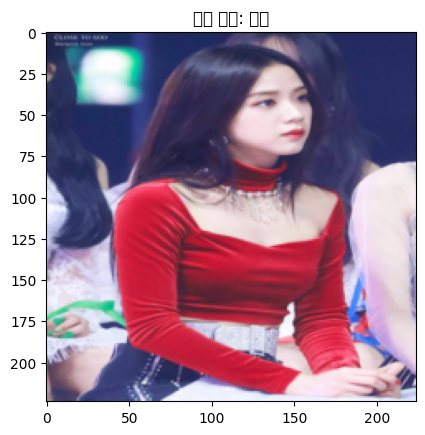

[예측 결과: 제니] (실제 정답: 제니)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


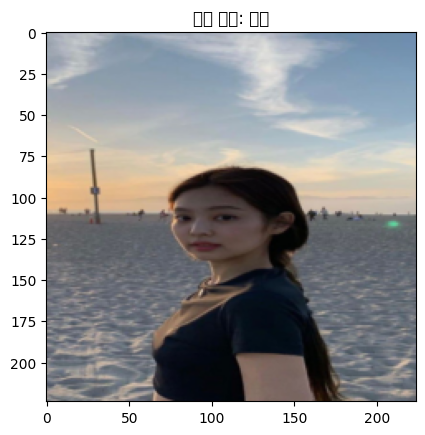

[예측 결과: 제니] (실제 정답: 지수)


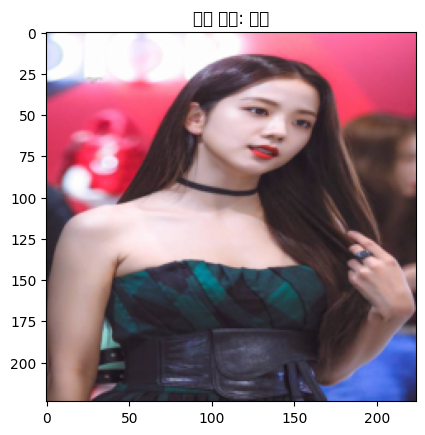

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


[예측 결과: 로제] (실제 정답: 로제)


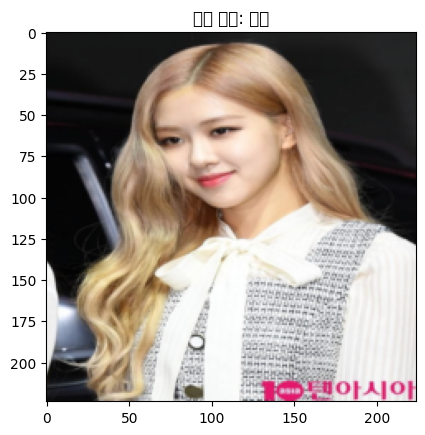

[예측 결과: 로제] (실제 정답: 로제)


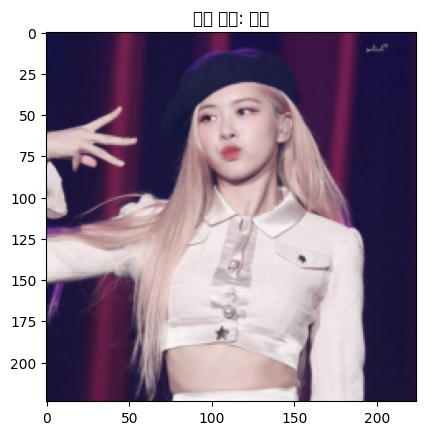

[예측 결과: 제니] (실제 정답: 제니)


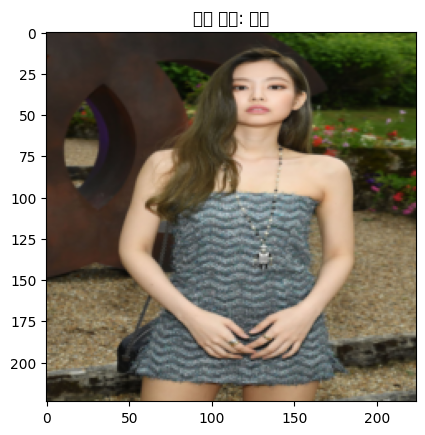

[예측 결과: 리사] (실제 정답: 리사)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


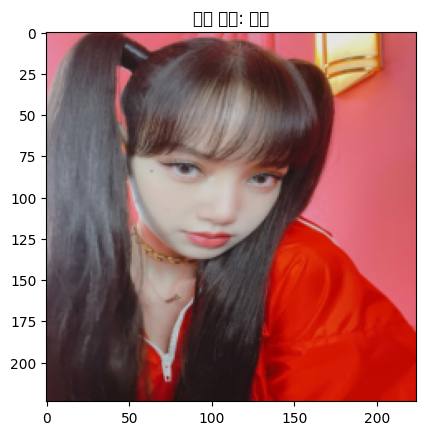

[예측 결과: 로제] (실제 정답: 로제)


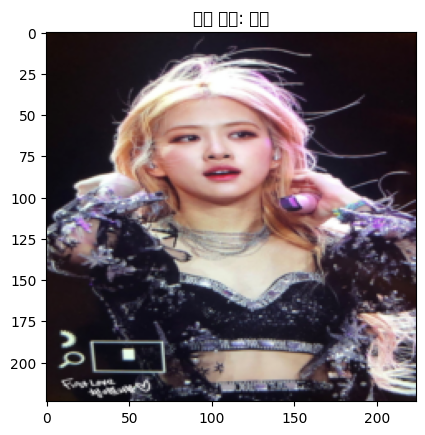

[예측 결과: 지수] (실제 정답: 제니)


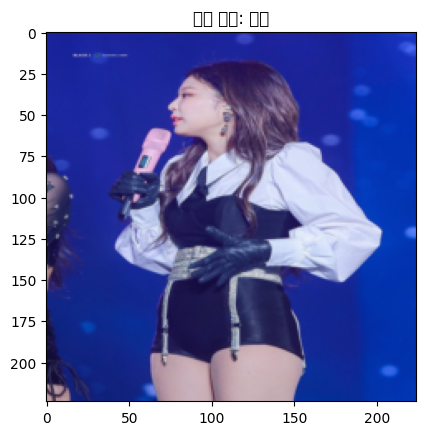

[예측 결과: 지수] (실제 정답: 리사)


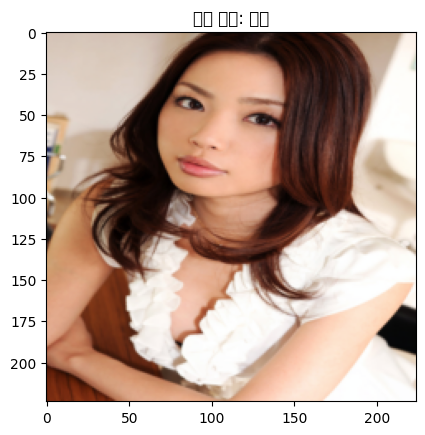

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyth

[Test Phase] Loss: 0.4987 Acc: 82.5000% Time: 6.9315s
(40, 4)


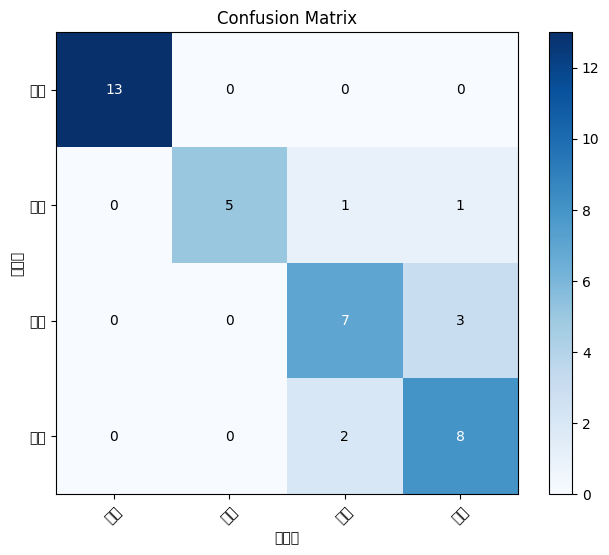

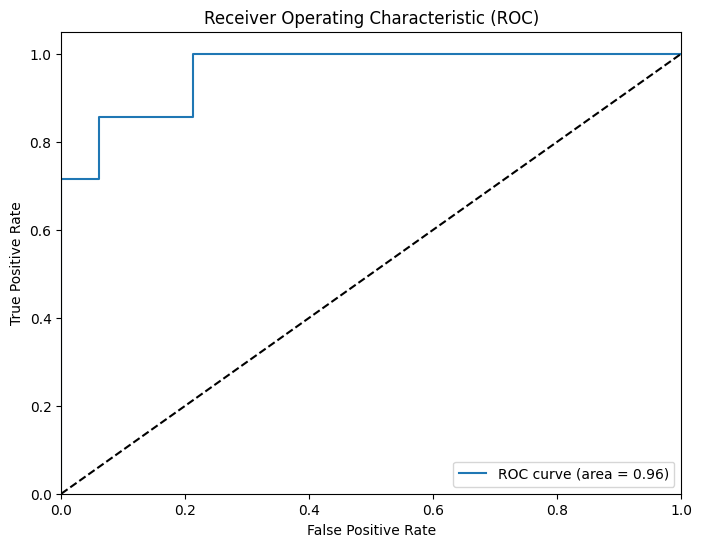

F1 스코어: 0.8152
Precision: 0.8417
Recall: 0.8036
Accuracy: 0.8250


In [62]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score

# ...

# 모델 평가
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0
    all_preds = []  # 예측 값들을 저장할 리스트
    all_labels = []  # 실제 레이블들을 저장할 리스트
    probs = []  # 확률값을 저장할 리스트

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        all_preds.extend(preds.cpu().numpy())  # 예측 값들을 리스트에 추가
        all_labels.extend(labels.data.cpu().numpy())  # 실제 레이블들을 리스트에 추가

        probs.extend(torch.nn.functional.softmax(outputs, dim=1).cpu().numpy())  # 확률값들을 리스트에 추가

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

    # `probs`와 `all_labels`의 길이를 확인하고 조정
    if len(probs) != len(all_labels):
        print("Error: Number of samples in `probs` and `all_labels` do not match.")
        exit()

    # `probs`의 shape 확인
    probs = np.array(probs)
    print(probs.shape)

# Confusion Matrix 계산
confusion = confusion_matrix(all_labels, all_preds)

# Precision 계산
precision = precision_score(all_labels, all_preds, average='macro')

# Recall 계산
recall = recall_score(all_labels, all_preds, average='macro')

# Accuracy 계산
accuracy = accuracy_score(all_labels, all_preds)

# Confusion Matrix 출력
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('예측값')
plt.ylabel('실제값')
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, confusion[i, j], ha='center', va='center', color='white' if confusion[i, j] > np.max(confusion) / 2 else 'black')
plt.show()

# ROC Curve 계산 및 그리기
fpr, tpr, thresholds = roc_curve(all_labels, probs[:, 1], pos_label=1)  # ROC Curve 계산
roc_auc = auc(fpr, tpr)  # AUC 계산

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# F1 Score 계산
f1 = f1_score(all_labels, all_preds, average='macro')

print('F1 스코어: {:.4f}'.format(f1))
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('Accuracy: {:.4f}'.format(accuracy))


#### <b>3. 분류 모델 API 개발</b>

* 학습된 분류 모델을 다른 사람이 사용할 수 있도록 API를 개발하여 배포합니다.
* 먼저 한 장의 이미지를 파일로부터 읽어와 분류 결과를 반환하는 기능을 작성합니다.

In [ ]:
# 테스트용 이미지 다운로드하기
!wget https://upload.wikimedia.org/wikipedia/commons/f/f1/Don_Lee_by_Gage_Skidmore.jpg -O test_image.jpg

--2023-05-21 06:33:27--  https://upload.wikimedia.org/wikipedia/commons/f/f1/Don_Lee_by_Gage_Skidmore.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4070584 (3.9M) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]   3.88M  19.0MB/s    in 0.2s    

2023-05-21 06:33:28 (19.0 MB/s) - ‘test_image.jpg’ saved [4070584/4070584]



In [ ]:
from PIL import Image


image = Image.open('test_image.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

NameError: ignored

* 웹 API 개방을 위해 <b>Ngrok</b> 서비스를 이용합니다.
* API 기능 제공을 위해 <b>Flask 프레임워크</b>를 사용합니다.

In [ ]:
# 필요한 라이브러리 설치하기
!pip install flask-ngrok

In [ ]:
import io
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request


# 이미지를 읽어 결과를 반환하는 함수
def get_prediction(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    return class_names[preds[0]]


app = Flask(__name__)


@app.route('/', methods=['POST'])
def predict():
    if request.method == 'POST':
        # 이미지 바이트 데이터 받아오기
        file = request.files['file']
        image_bytes = file.read()

        # 분류 결과 확인 및 클라이언트에게 결과 반환
        class_name = get_prediction(image_bytes=image_bytes)
        print("결과:", {'class_name': class_name})
        return jsonify({'class_name': class_name})

* API를 개방할 수 있으며 실행할 때마다 서버의 주소가 변경됩니다.
* 서버 주소를 정확히 확인할 필요가 있습니다.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://c4cdb8de3a35.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


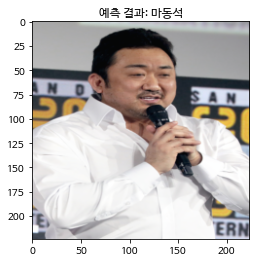

127.0.0.1 - - [23/Feb/2021 08:06:33] "POST / HTTP/1.1" 200 -


결과: {'class_name': '마동석'}


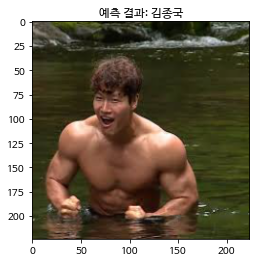

127.0.0.1 - - [23/Feb/2021 08:06:51] "POST / HTTP/1.1" 200 -


결과: {'class_name': '김종국'}


In [ ]:
run_with_ngrok(app)
app.run()

* 클라이언트 테스트 방법

<pre>
curl -X POST -F file=@{이미지 파일명} {Ngrok 서버 주소}
</pre>

* 사용 예시

<pre>
curl -X POST -F file=@dongseok.jpg http://c4cdb8de3a35.ngrok.io/
</pre>

* 이러한 방식으로 웹, 모바일, 게임 등의 소프트웨어 환경에서 API를 호출하는 방식으로 인공지능 앱을 개발할 수 있습니다.